In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/Colab Notebooks/'

arabica_ratings_raw.csv    t10k-labels-idx1-ubyte.gz   tree.png
coffee.ipynb		   train-images-idx3-ubyte.gz  Untitled0.ipynb
MQDF.ipynb		   train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz  tree.dot


In [3]:
import gzip
import numpy as np
import math
import matplotlib.pyplot as plt

# import mnist
f = gzip.open('/content/drive/MyDrive/Colab Notebooks/train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 60000
buf = f.read(image_size * image_size * num_images)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(num_images, image_size*image_size)

f = gzip.open('/content/drive/MyDrive/Colab Notebooks/train-labels-idx1-ubyte.gz','r')  
buf = f.read(60000)
y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

f = gzip.open('/content/drive/MyDrive/Colab Notebooks/t10k-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 10000
buf = f.read(image_size * image_size * num_images)
X_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test = X_test.reshape(num_images, image_size*image_size, 1)

f = gzip.open('/content/drive/MyDrive/Colab Notebooks/train-labels-idx1-ubyte.gz','r')  
buf = f.read(60000)
y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

# class name 0-9
cla = [0,1,2,3,4,5,6,7,8,9]

In [4]:
# calculate info of class
mean = [] # list of mean of class
cov = [] # list of mean of covariance matrix of class
for class_name in cla:
    temp = X_train[y_train==class_name] # class i (number i)
    temp_mean = temp.mean(axis=0) # calculate mean
    mean.append(temp_mean)
    temp_cov = np.cov(X_train[y_train==0].T) # calculate covairance
    cov.append(temp_cov)

In [10]:
def cal_eigen(h):
    # calculate modify covariance
    print('calculate modify covariance')
    modify_covmatrix = []
    for cov_ in cov:
        cov_modefied = cov_ + h * h * np.identity(784)
        modify_covmatrix.append(cov_modefied)

    # calculate eigenvalues and eigenvectors
    print('calculate eigenvalues and eigenvectors')
    eigvals_list = []
    eigvecs_list = []
    for i in range(10):
        eigvals, eigvecs = np.linalg.eig(modify_covmatrix[i])
        eigvals_list.append(eigvals)
        eigvecs_list.append(eigvecs)
    return eigvals_list, eigvecs_list

In [33]:
# classify test data one by one
def point_classification(x, eigvals_list, eigvecs_list):
    class_value = [] # list of class
    for i in range(10):
        # calculate MADF by class
        eigvals, eigvecs = eigvals_list[i], eigvecs_list[i] # calculate eigenvalue and eigenvector
        mean[i].resize(784,1)
        mqdf = 0
        a = x-mean[i]
        #print('calculate MADF by class')
        for j in range(len(eigvals)):
            dot = np.dot(eigvecs[[j]], a)
            mqdf -= dot ** 2 / abs(eigvals[j])
            mqdf -= math.log(abs(eigvals[j]))
        class_value.append(mqdf)
    #print('calculate class has max value')
    result_x = class_value.index(max(class_value)) # calculate class has max value
    return result_x

In [36]:
# calculate accuracy using test data
def predict(h):
    print('predicting start')
    eigvals_list, eigvecs_list = cal_eigen(h)
    right_num = 0 # number of right calssified data
    test_result = [] # store test result
    for i in range(10000):
        x = X_test[i]
        result = point_classification(x, eigvals_list, eigvecs_list)
        if result == y_test[i]:
            right_num += 1
        test_result.append(result)
        if i % 100 == 0:
            print(str(i) + ' test samples are predicted')
    score = right_num / 10000
    print('predicting end')
    return score, test_result

In [37]:
# hyperparameter (h) tuning
h_list = [i/100 for i in range(1,10)]
score_list = []
test_result_list = []
for h in h_list:
    print ('h = ' + str(h))
    score, test_result = predict(h)
    print ('score is ' + str(score))
    score_list.append(score)
    test_result_list.append(test_result)

h = 0.01
predicting start
calculate modify covariance
calculate eigenvalues and eigenvectors
0 test samples are predicted
100 test samples are predicted
200 test samples are predicted
300 test samples are predicted
400 test samples are predicted
500 test samples are predicted
600 test samples are predicted
700 test samples are predicted
800 test samples are predicted
900 test samples are predicted
1000 test samples are predicted
1100 test samples are predicted
1200 test samples are predicted
1300 test samples are predicted
1400 test samples are predicted
1500 test samples are predicted
1600 test samples are predicted
1700 test samples are predicted
1800 test samples are predicted
1900 test samples are predicted
2000 test samples are predicted
2100 test samples are predicted
2200 test samples are predicted
2300 test samples are predicted
2400 test samples are predicted
2500 test samples are predicted
2600 test samples are predicted
2700 test samples are predicted
2800 test samples are p

KeyboardInterrupt: ignored

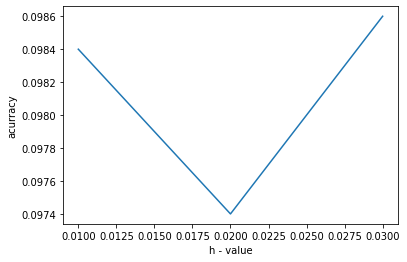

In [39]:
# save result as png
plt.plot(h_list[:3], score_list)
plt.xlabel('h - value')
plt.ylabel('acurracy')
plt.savefig('result.png')

In [ ]:
# you can choose best h-value using result.png